# Introduction to Filter 

## Recap Propability 

### Calculating with probability
The propability that event A and B occurs is calculated as follows:
$P(A) \cap P(B) = P(A) * P(B) $ <br>
**Example Dices**
Rolling six 3 times in a series
* Propability of rolling a six P(A) = \frac{1}{6}
* Propability $P(B)$ of rolling 3 times six in a serie: <br>
$P(B) = 3*P(A)$ <br>
* ***Condition: Event must be independend !!!!***

### Conditionaly Propability (bedingte Wahrscheinlichkeit)
As we already know rolling the dices in series is not a conditional event, because the current roll is independed from prior roll.
So the conditionaly propability is the probability of occurrence of an event $A$ on the condition that the occurrence of another event $B$. The notation $P(A|B)$.



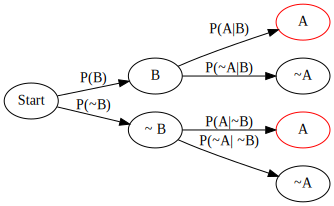

In [2]:
from graphviz import Digraph
g = Digraph('G')

g.attr(rankdir='LR')
g.node('A',color='red')
g.node(' A',color='red')
g.edge('Start', 'B',label='P(B)')
g.edge('Start','~ B', label='P(~B)')

g.edge('B' , ' A', label='P(A|B)')
g.edge('B', ' ~A', label='P(~A|B)')

g.edge('~ B', 'A', label='P(A|~B)')
g.edge('~ B', '~A', label= 'P(~A| ~B)')
g

Let's use an example. We have a box with 4 black and 6 white balls. The questions is - Whats the probability to pick a black ball with the second pull. 
* W: pull a white ball
* B: pull a black ball 
* P(W) = 6/10
* P(B) = 4/10 
* P(B|W) = 4/9
* P(B|~W)= 3/9 

Our decision tree looks as follows: 

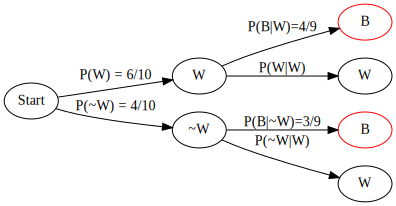

In [3]:
g = Digraph('G')

g.attr(rankdir='LR')
g.node(' B',color='red')
g.node('  B',color='red')

g.edge('Start', 'W',label='P(W) = 6/10')
g.edge('Start','~W', label='P(~W) = 4/10')

g.edge('W' , '  B', label='P(B|W)=4/9')
g.edge('W', '  W', label='P(W|W)')

g.edge('~W', ' B', label='P(B|~W)=3/9')
g.edge('~W', ' W', label= 'P(~W|W)')
g

In this example we can easily multiply the propabilities along the path.
$P(B) = P(W \cap B) = P(W)*P(B|W) = 6/10 *4/9 = 0.1667 $<br>
and <br>
$P(B) = P(\sim W \cap B) = P(\sim W)*P(B|\sim W) = 4/10 *3/9 = 0.1333 $


This does not clarify the answer about the propability of the occurence of the event B, since we have two paths. Therefore we need the total propability. 


### Total Propability 
The theorem of total probability provides an answer to the question of how big the total probability of the event $B$. We know the rules:
* multiply along a path 
* add propabilies of events vertical 

$P(B) = P(W \cap B) + P(\sim W \cap B) = P(W)*P(B|W) +  P(\sim W)*P(B|\sim W)$

For our example we can calculate the propabily of the event <br>$B = 0.1333+ 0.1667 = 0.4 $


### Bayes Theorem
Bayes is used to calculate conditional propabilities. So in our example we already calculated $P_W(B)$. <br>
Bayes gives us a rule to calc $P_B(W)$. To discribe the derivation we need to rewrite the tree diagram:



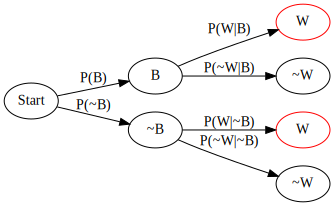

In [4]:
g = Digraph('G')

g.attr(rankdir='LR')
g.node('W',color='red')
g.node(' W',color='red')

g.edge('Start', 'B',label='P(B)')
g.edge('Start','~B', label='P(~B)')

g.edge('B' , 'W', label='P(W|B)')
g.edge('B', '~W', label='P(~W|B)')

g.edge('~B', ' W', label='P(W|~B)')
g.edge('~B', ' ~W', label= 'P(~W|~B)')
g

So we already know that <br> $P_W(B) = \frac{P(W \cap B)}{ P(W)}$ <br>and analog to our new rewritten tree we can write <br>
$P_B(W) = \frac{P(W \cap B)}{P(B)}$ <br>
Finally we can write : <br>
$P_B(W) = \frac{P_W(B) *P(W)}{P(B)}$ <br>

That means for our example. 
$P_B(W) = \frac{P_W(B) *P(W)}{P(B)} = \frac{(4/9)*(6/10)}{(4/10)}  = 0.667 $ <br>
We can do a probe and check our result with our first tree. The conditional propability is $P_B(W)= 6/9 = 0.667$




### Distribution 
* modal
* unimodal
* symetrisch 

#### Gaussian 
Gaussian is a continuous function over the space of locations and the area underneath sums up to 1.

$f(x)= \frac{1}{\sqrt{2\pi*\sigma^2}}*e^{-\frac{1}{2}*\frac{(x-\mu)^2}{\sigma^2}}$

Example of an 1 Dimensional Gaussian Distribution with a given $\mu$ and $\sigma$

In [6]:
# Todo 
def gauss(x,mu,sigma):
    
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

Text(0.5,1,'Normal Distribution of $\\mu = 6 $ and $\\sigma=0.2$')

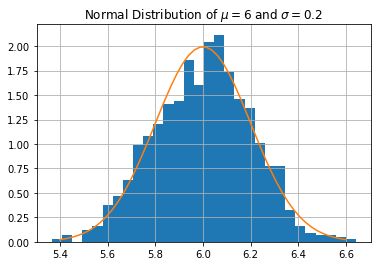

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

mu = 6 
sigma = 0.2
s = np.random.normal(mu, sigma, 1000) # creates samples 
plt.hist(s, 30, density=True) # plots histogramm of 

x = np.linspace(mu-3*sigma,mu+3*sigma)
y = gauss(x,mu,sigma)
plt.plot(x,y) # plot the gaussian distribution 
plt.grid(True)
title = ('Normal Distribution of $\mu = {} $ and $\sigma={}$').format(mu,sigma)
plt.title(title)

### GPS example

Now just think of a GPS signal, receiving x and y coordinates. The uncertainty is kept in a covariance matrix. For a gps signal we use for example 
<br>
$
cov = \begin{pmatrix}
\sigma_x & b \\
c & \sigma_y
\end{pmatrix}
$
<br>

**Question ?**
* What's the meaning of c and d ? 

**Example:** 
Create a Normal Distribution of a GPS Signal with a expected position of $x= 2$ and $y= 5$ 
Assume that we have a $\sigma_x = 2$ and a $\sigma_y= 6$  

Text(0.5,1,'Normal Distribution of $\\mu_x = 2$ and $\\mu_y=5$ \n cov=[[2, 0], [0, 18]] ')

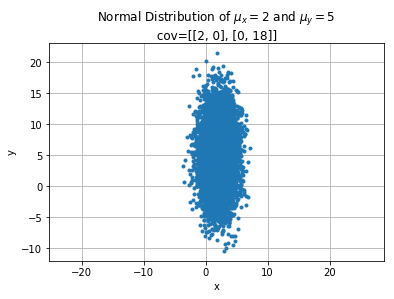

In [15]:
mu_x,mu_y = 2,5
sigma_x, sigma_y = 2,18
cov = [[sigma_x,0],[0,sigma_y]]
xy = np.random.multivariate_normal([mu_x,mu_y], cov, 10000)

plt.plot(xy[:,0],xy[:,1],'.' )
plt.axis('equal')
plt.grid(True)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
title = ('Normal Distribution of $\mu_x = {}$ and $\mu_y={}$ \n cov={} ').format(mu_x,mu_y,cov)
plt.title(title)

Visualize by using 3d plots and scipy.stats 


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#Create grid and multivariate normal
x = np.linspace(mu_x-3*sigma_x,mu_x+3*sigma_x,500)
y = np.linspace(mu_y-3*sigma_y,mu_y+3*sigma_y,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[sigma_x, 0], [0, sigma_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='jet',linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('count')
title = ('Normal Distribution of $\mu_x = {}$ and $\mu_y={}$ \n cov={} ').format(mu_x,mu_y,cov)
ax.set_title(title)
plt.show()

ImportError: numpy.core.multiarray failed to import